# Schelling's Segregation Model
(for the nearest neighbor) using MPI shared memory model 

In [198]:
import numpy as np
import matplotlib.pyplot as plt

In [199]:
# object is going to move when
# 'number of neighbors of the other color > coeff * 8'
coeff  = 3/8
n_steps = 100
!>initial.bin
!>resulting.bin
!mpic++ distilled.cpp -o schelling
!mpirun -n 8 schelling {n_steps} {coeff}
# check it for different coeff-s: 1/2, 2/8, 3/8, 0, 1/8, 1 
# (maybe there are other "interesting" ones
# [I mean those, which are interesting 
# in theory or give beautiful results in practice])
# try to explain results (expected and obtained)

number of whites BEFORE: 16122
___..__..__..___  AFTER: 16122

Elapsed time: 0.051454 s


In [200]:
initial    = np.fromfile("initial.bin", dtype=np.int32)
resulting  = np.fromfile("resulting.bin", dtype=np.int32)

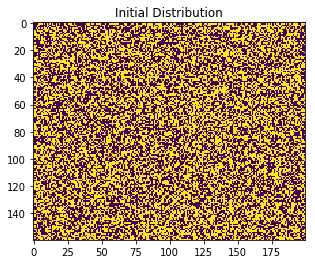

In [201]:
plt.imshow(initial.reshape(160,200))
plt.title("Initial Distribution");

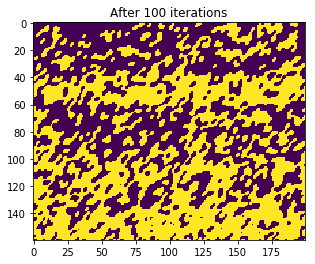

In [202]:
plt.imshow(resulting.reshape(160,200))
plt.title("After %s iterations" % n_steps);

### Possible Improvements

_In the visualization part:_

- make an animation
  (one animation step must be equivalent to the following instruction: 
    1. increase the color value of all pixels, i.e. make it closer to the value of white color (presumably 0 - black, 1 - white) and of course, it cannot be whiter than white. This is a kind of attenuation of old distributions. 
    2. set color of the black pixels from the new distribution (generated in the next iteration step) to the black color value (presumably 0)
    
_In the program code:_

- replace the splitting "into strips" by splitting into blocks  
- add a feature: change the size of the computational area
- add a feature: set different tolerance thresholds for city districts
- generalize to the case of k nearest neighbors  
  (add features: change the size of the window, choose weights decay function)
- add OpenMP
- split into several files and write Makefile (optionally)